In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import rc

%matplotlib inline

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [2]:
add = pd.read_excel(r'C:\Users\2106-017\python\team_S\전체동.xlsx')
add.drop('Unnamed: 0', inplace=True, axis=1)
add

,동,자치구,출생,사망,전입,전출,혼인,이혼,cluster,주민센터 이름,주민센터 주소,위도,경도
0,개포1동,강남구,17,29,829,937,12,13,1,개포1동 주민센터,서울특별시 강남구 개포로 310-17,37.481054,127.053708
1,개포2동,강남구,152,57,9853,4191,61,28,0,개포2동 주민센터,서울특별시 강남구 개포로 511,37.489774,127.069120
2,개포4동,강남구,91,57,4408,3308,91,41,2,개포4동 주민센터,서울특별시 강남구 개포로38길 12,37.478999,127.051657
3,논현1동,강남구,93,81,5141,5967,112,45,0,논현1동 주민센터,서울특별시 강남구 학동로20길 25,37.511555,127.028446
4,논현2동,강남구,102,76,4171,4824,87,40,2,논현2동 주민센터,서울특별시 강남구 학동로43길 17,37.517375,127.037196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,상봉2동,중랑구,126,96,4437,4029,160,44,2,상봉2동 주민센터,서울특별시 중랑구 봉우재로 93-5,37.589362,127.074210
423,신내1동,중랑구,183,249,3719,4709,95,49,2,신내1동 주민센터,서울특별시 중랑구 용마산로129나길 35,37.605930,127.099529
424,신내2동,중랑구,132,139,2182,2903,74,39,1,신내2동 주민센터,서울특별시 중랑구 봉화산로 190,37.606256,127.094209
425,중화1동,중랑구,131,118,2619,3157,98,34,1,중화1동 주민센터,서울특별시 중랑구 동일로134길 17,37.601147,127.080641


In [3]:
in_col = ['출생', '사망', '전입', '전출', '혼인', '이혼']
add_kmean = add[in_col]
add_kmean

,출생,사망,전입,전출,혼인,이혼
0,17,29,829,937,12,13
1,152,57,9853,4191,61,28
2,91,57,4408,3308,91,41
3,93,81,5141,5967,112,45
4,102,76,4171,4824,87,40
...,...,...,...,...,...,...
422,126,96,4437,4029,160,44
423,183,249,3719,4709,95,49
424,132,139,2182,2903,74,39
425,131,118,2619,3157,98,34


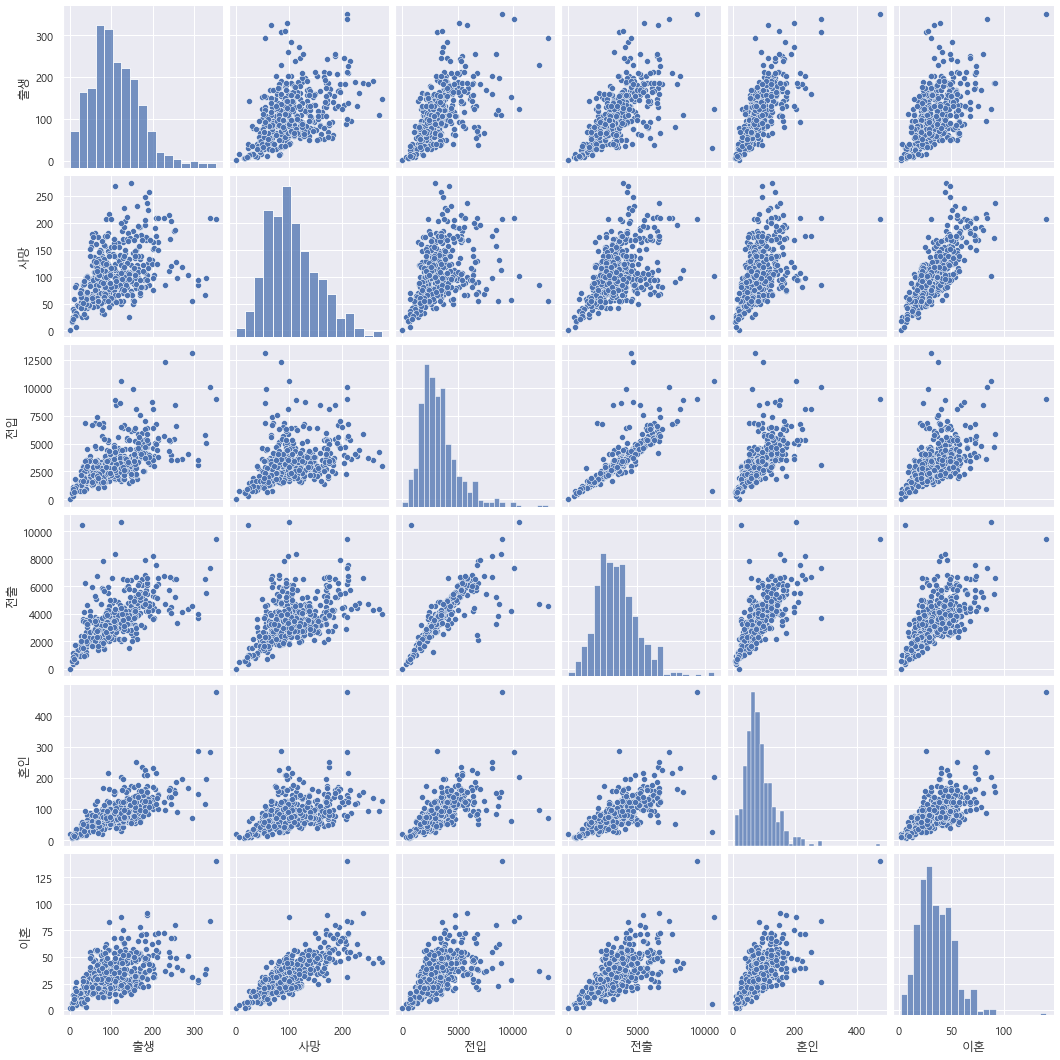

In [5]:
sns.pairplot(add_kmean)

<AxesSubplot:xlabel='전입', ylabel='전출'>

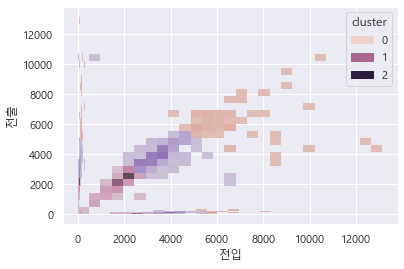

In [13]:
sns.histplot(x=add['전입'], y=add['전출'], hue = add['cluster'])

<AxesSubplot:xlabel='사망', ylabel='이혼'>

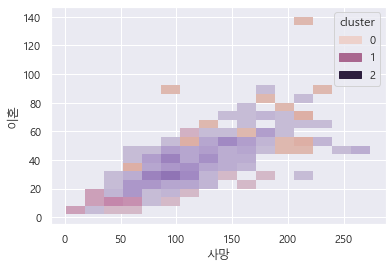

In [14]:
sns.histplot(x=add['사망'], y=add['이혼'], hue = add['cluster'])

<AxesSubplot:xlabel='혼인', ylabel='출생'>

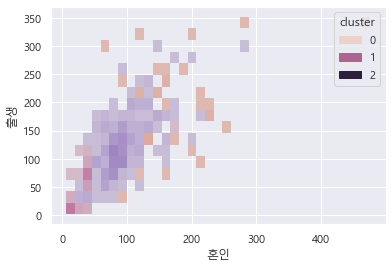

In [15]:
sns.histplot(x=add['혼인'], y=add['출생'], hue = add['cluster'])

<AxesSubplot:xlabel='혼인', ylabel='전출'>

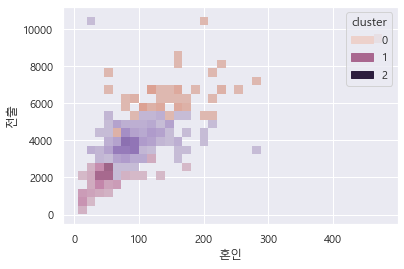

In [16]:
sns.histplot(x=add['혼인'], y=add['전출'], hue = add['cluster'])

<AxesSubplot:xlabel='혼인', ylabel='이혼'>

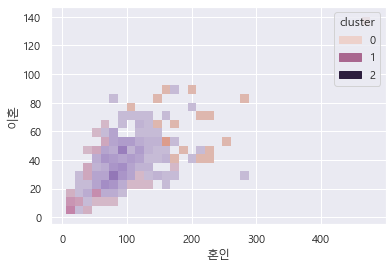

In [17]:
sns.histplot(x=add['혼인'], y=add['이혼'], hue = add['cluster'])

<AxesSubplot:xlabel='혼인', ylabel='전입'>

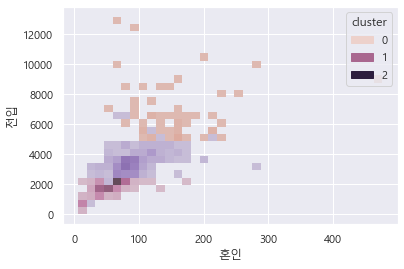

In [18]:
sns.histplot(x=add['혼인'], y=add['전입'], hue = add['cluster'])

<AxesSubplot:xlabel='전출', ylabel='이혼'>

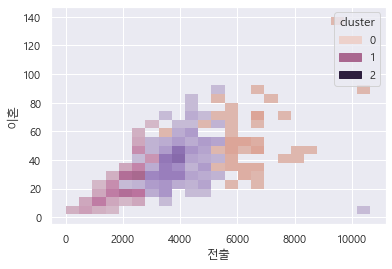

In [19]:
sns.histplot(x=add['전출'], y=add['이혼'], hue = add['cluster'])

<AxesSubplot:xlabel='전출', ylabel='출생'>

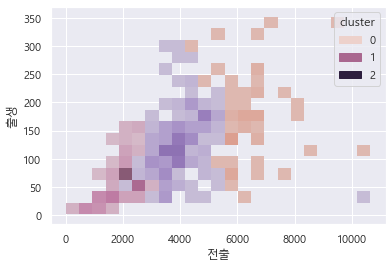

In [20]:
sns.histplot(x=add['전출'], y=add['출생'], hue = add['cluster'])

C:\Users\2106-017\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='전출', ylabel='전입'>

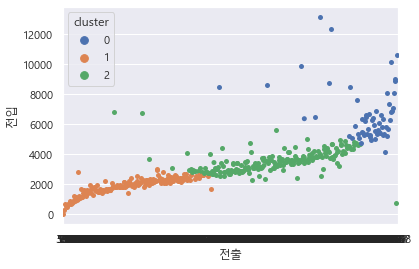

In [22]:
sns.swarmplot(x = add['전출'], y = add['전입'], hue=add['cluster'])

<AxesSubplot:>

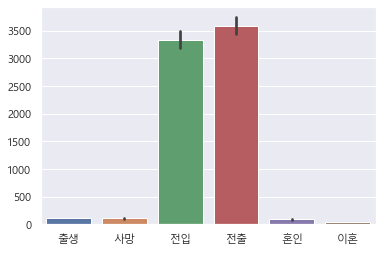

In [24]:
sns.barplot(data=add_kmean)

# 위경도를 넣어볼까

In [25]:
in_col = ['출생', '사망', '전입', '전출', '혼인', '이혼', '위도', '경도']
add_kmean_1 = add[in_col]
add_kmean_1

,출생,사망,전입,전출,혼인,이혼,위도,경도
0,17,29,829,937,12,13,37.481054,127.053708
1,152,57,9853,4191,61,28,37.489774,127.069120
2,91,57,4408,3308,91,41,37.478999,127.051657
3,93,81,5141,5967,112,45,37.511555,127.028446
4,102,76,4171,4824,87,40,37.517375,127.037196
...,...,...,...,...,...,...,...,...
422,126,96,4437,4029,160,44,37.589362,127.074210
423,183,249,3719,4709,95,49,37.605930,127.099529
424,132,139,2182,2903,74,39,37.606256,127.094209
425,131,118,2619,3157,98,34,37.601147,127.080641


In [26]:
kmeans = KMeans(n_clusters=3, random_state=1234).fit(add_kmean_1)

In [27]:
add_kmean_1['cluster'] = kmeans.labels_
add_kmean_1

C:\Users\2106-017\AppData\Local\Temp/ipykernel_344504/4152592092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_kmean_1['cluster'] = kmeans.labels_


,출생,사망,전입,전출,혼인,이혼,위도,경도,cluster
0,17,29,829,937,12,13,37.481054,127.053708,0
1,152,57,9853,4191,61,28,37.489774,127.069120,1
2,91,57,4408,3308,91,41,37.478999,127.051657,2
3,93,81,5141,5967,112,45,37.511555,127.028446,1
4,102,76,4171,4824,87,40,37.517375,127.037196,2
...,...,...,...,...,...,...,...,...,...
422,126,96,4437,4029,160,44,37.589362,127.074210,2
423,183,249,3719,4709,95,49,37.605930,127.099529,2
424,132,139,2182,2903,74,39,37.606256,127.094209,0
425,131,118,2619,3157,98,34,37.601147,127.080641,0


In [28]:
add_kmean_1['cluster'].value_counts()

2    199
0    168
1     60
Name: cluster, dtype: int64

In [29]:
import folium

In [30]:
m = folium.Map(
    location = (sum(add['위도'])/len(add['위도']), sum(add['경도'])/len(add['경도']) ),
    tiles = 'cartodbdark_matter',
    zoom_start = 11.5)

In [31]:
for i in range(add.shape[0]):
    
    if add['cluster'][i] == 0:
        color = 'blue'
    elif add['cluster'][i] == 1:
        color = 'red'
    elif add['cluster'][i] == 2:
        color = 'green'
    else :
        pass
    c = add.iat[i,11],add.iat[i,12]
    folium.Circle(c, popup=add['cluster'][i], color = color).add_to(m)

In [32]:
m

In [33]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [34]:
std_data = std.fit_transform(add_kmean_1.drop('cluster', axis=1))

In [36]:
std_data = pd.DataFrame(std_data, columns=add_kmean_1.drop('cluster',axis=1).columns)

In [37]:
kmeans = KMeans(n_clusters=3, random_state=1234).fit(std_data)

In [40]:
add_kmean['cluster'] = kmeans.labels_
add['cluster'] = add_kmean_1['cluster']

C:\Users\2106-017\AppData\Local\Temp/ipykernel_344504/1091137608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_kmean['cluster'] = kmeans.labels_


In [39]:
m_1 = folium.Map(
    location = (sum(add['위도'])/len(add['위도']), sum(add['경도'])/len(add['경도']) ),
    tiles = 'cartodbdark_matter',
    zoom_start = 11.5)

In [41]:
for i in range(add.shape[0]):
    
    if add['cluster'][i] == 0:
        color = 'blue'
    elif add['cluster'][i] == 1:
        color = 'red'
    elif add['cluster'][i] == 2:
        color = 'green'
    else :
        pass
    c = add.iat[i,11],add.iat[i,12]
    folium.Circle(c, popup=add['cluster'][i], color = color).add_to(m_1)

In [42]:
m

In [43]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [44]:
mmdata = minmax.fit_transform(add_kmean_1.drop('cluster', axis=1))
mmdata = pd.DataFrame(mmdata, columns=add_kmean_1.drop('cluster', axis=1).columns)

In [45]:
kmeans = KMeans(n_clusters=3, random_state=1234).fit(mmdata)

In [46]:
m_2 = folium.Map(
    location = (sum(add['위도'])/len(add['위도']), sum(add['경도'])/len(add['경도']) ),
    tiles = 'cartodbdark_matter',
    zoom_start = 11.5)

In [47]:
for i in range(add.shape[0]):
    
    if add['cluster'][i] == 0:
        color = 'blue'
    elif add['cluster'][i] == 1:
        color = 'red'
    elif add['cluster'][i] == 2:
        color = 'green'
    else :
        pass
    c = add.iat[i,11],add.iat[i,12]
    folium.Circle(c, popup=add['cluster'][i], color = color).add_to(m_2)

In [49]:
m_2

<AxesSubplot:>

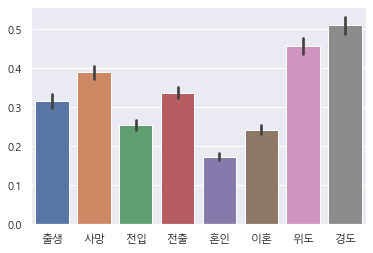

In [50]:
sns.barplot(data=mmdata)